In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


In [72]:
# network size N
N = 8
## start out with no infectious individuals
X = np.zeros(N)

## edge matrix 
E = np.array([[0,2],
              [1,2],
              [2,3],
              [2,4],
              [3,6],
              [5,3],
              [3,4],
              [4,7],
              [4,6]])

## number of edges
M = np.shape(E)[0]

## infection rate
b = 1.1

## initialize time
T = 0

# maintain list of times 
times = []

#maintain list of infected individuals
no_infected = []

## choose Tmax
Tmax = 10

## initial condition
X[2] = 1


In [73]:
## code without comments:
while T < Tmax:
    no_infected.append(np.sum(X))
    times.append(T)
    T += np.random.exponential(scale = (N + b*M)**(-1), size = 1)[0]
    if np.random.random() < N/(N + b*M):
        X[np.random.choice(np.arange(0,N))] = 0
    else:
        random_edge = np.random.choice(np.arange(0,M))
        state_node_1, state_node_2 = X[E[random_edge][0]], X[E[random_edge][1]]
        X[E[random_edge][0]] = X[E[random_edge][1]] = 1*(state_node_1 or state_node_2)


In [32]:
while T < Tmax:
    no_infected.append(np.sum(X))
    times.append(T)
    ## time for next event
    T += np.random.exponential(scale = (N + b*M)**(-1), size = 1)[0]
    ## find next event

    ## expression equal to probability of picking any node (set random node state to 0) 
    ## either a recovery event or an event where nothing happens (S node remains S)
    if np.random.random() < N/(N + b*M):
        X[np.random.choice(np.arange(0,N))] = 0
    
    ## if we don't choose a node, we have chosen an edge, compute OR expression 
    ## on a random edge from the edge list
    else:
        ## choose an index for a edgee randomly from edge matrix
        random_edge = np.random.choice(np.arange(0,M))
        ## take the nodes of the random edge and determine their states (1= infected, 0= susceptible)
        state_node_1, state_node_2 = X[E[random_edge][0]], X[E[random_edge][1]]
        ## or operation to deduce whether or not there is a spreading event, set the nodes both equal to same state
        X[E[random_edge][0]] = X[E[random_edge][1]] = 1*(state_node_1 or state_node_2)


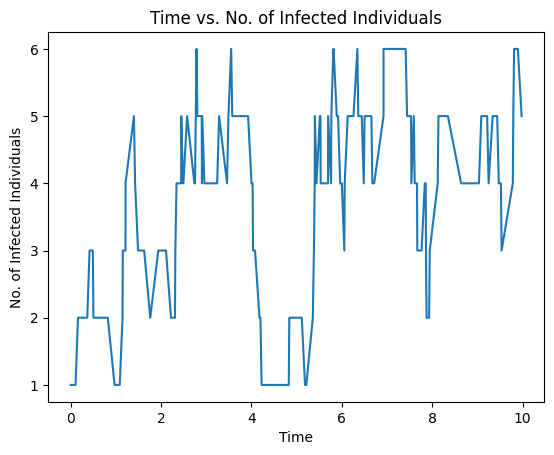

In [74]:
plt.plot(times, no_infected)
plt.title('Time vs. No. of Infected Individuals')
plt.ylabel('No. of Infected Individuals')
plt.xlabel('Time')
plt.show()
